# PLEIADES Tutorial - SAMMY Exercise EX012: Treating Multiple Nuclides in a Sample

## Overview

This notebook provides a comprehensive guide to SAMMY Exercise EX012 from the PLEIADES examples.
The exercise demonstrates how to handle samples containing multiple nuclides, a scenario frequently encountered in real-world experiments.
By leveraging PLEIADES, users will learn to configure, execute, and analyze SAMMY runs for such complex cases.

### Objectives

- Understand how to use PLEIADES to manage SAMMY runs for samples with multiple nuclides.
- Learn to define spin groups, resonance parameters, and nuclide abundances.
- Explore the impact of individual isotopes or spin groups on the overall sample.
- Refine resonance parameters and nuclide abundances to improve the fit to experimental data.

### Key Details

1. **Using PLEIADES**:
    - This notebook demonstrates the step-by-step process of setting up and executing SAMMY runs using PLEIADES.
    - It includes configuring the environment, setting up necessary files, running SAMMY, and analyzing the results.

2. **Handling Multiple Nuclides**:
    - The exercise focuses on treating samples with multiple isotopes or contaminants.
    - Users will learn to exclude specific spin groups and analyze their contributions to the overall sample.

3. **Practical Insights**:
    - Gain insights into how resonance parameters and spin groups influence experimental results.
    - Experiment with different configurations to understand the behavior of the sample.

### Instructions

Follow the steps in this notebook to configure the SAMMY environment, setup the required files, and execute the SAMMY runs.
Analyze the results to refine nuclide abundances and resonance parameters.
Experiment with excluding specific spin groups to observe their individual contributions and deepen your understanding of treating multiple nuclides in a sample.

## Step 0: First pass

We will create a workspace directory for the exercise and set up the necessary files.

In [1]:
from pathlib import Path

# Get current working directory (notebook location)
current_dir = Path.cwd()

# Create a dedicated sammy_workspaces folder for all runs
sammy_base_dir = current_dir / "workspaces"
sammy_base_dir.mkdir(exist_ok=True)
# Create a timestamped working directory within our persistent folder
base_dir_name = "Si_Transmission"
working_dir = sammy_base_dir / base_dir_name
output_dir = working_dir / "results"

# Create the directories if they do not exist
working_dir.mkdir(parents=True, exist_ok=True)
output_dir.mkdir(parents=True, exist_ok=True)

We will be using the `ex012` example files for this tutorial, so let's specify the path to the source file directory

In [2]:
source_dir = current_dir / "../samexm/ex012/"

# let's list the tree of the source directory
def list_tree(startpath: Path, prefix: str = ""):
    """Recursively print a tree structure of the directory like `tree` command."""
    entries = sorted(startpath.iterdir(), key=lambda x: (not x.is_dir(), x.name.lower()))
    entries_count = len(entries)

    for index, path in enumerate(entries):
        connector = "└── " if index == entries_count - 1 else "├── "
        print(prefix + connector + path.name)

        if path.is_dir():
            extension = "    " if index == entries_count - 1 else "│   "
            list_tree(path, prefix + extension)

print("Source directory tree:")
list_tree(source_dir)

Source directory tree:
├── ex012a
├── ex012a.dat
├── ex012a.inp
├── ex012a.par
└── README.FIRST


Now that we verify the files needed for the exercise are in place, we can proceed to setup a runner with `pleiades`.

In [3]:
from pleiades.sammy.factory import SammyFactory

runner = SammyFactory.create_runner(
    backend_type="local",
    working_dir=working_dir,
    output_dir=output_dir,
)

runner

2025-05-09 14:48:39 | DEBUG    | pleiades.sammy.factory:list_available_backends:76 - Local SAMMY found at: /Users/8cz/code.ornl.gov/SAMMY/build/bin/sammy
2025-05-09 14:48:39 | DEBUG    | pleiades.sammy.factory:list_available_backends:90 - Docker backend available
2025-05-09 14:48:39 | DEBUG    | pleiades.sammy.factory:list_available_backends:100 - NOVA credentials found


Here we are using the local runner for the exercise, but you should be able to adapt this to use other runners as needed.

The next step is to tell `pleiades` where the start input files are:

- **Input File**: `ex012a.inp` - Defines spin groups for different isotopes.
- **Parameter File**: `ex012a.par` - Contains resonance data grouped by nuclide.
- **Data File**: `ex012a.dat` - Provides "real data" for transmission through natural silicon.

These files are essential for running the SAMMY exercise and analyzing the results.

In [4]:
from pleiades.sammy.interface import SammyFiles

files_step_0 = SammyFiles(
    input_file=source_dir / "ex012a.inp",
    parameter_file=source_dir / "ex012a.par",
    data_file=source_dir / "ex012a.dat",
)

Now let's pass the file to the runner to verify and setup.

In [5]:
runner.prepare_environment(files=files_step_0)

2025-05-09 14:48:42 | DEBUG    | pleiades.sammy.backends.local:prepare_environment:44 - Validating input files
2025-05-09 14:48:42 | DEBUG    | pleiades.sammy.backends.local:prepare_environment:48 - Moving files to working directory
2025-05-09 14:48:42 | DEBUG    | pleiades.sammy.interface:move_to_working_dir:84 - Moving files to working directory: /Users/8cz/tmp/PLEIADES/examples/Notebooks/workspaces/Si_Transmission
2025-05-09 14:48:42 | DEBUG    | pleiades.sammy.interface:move_to_working_dir:100 - Copying input file: /Users/8cz/tmp/PLEIADES/examples/Notebooks/../samexm/ex012/ex012a.inp -> /Users/8cz/tmp/PLEIADES/examples/Notebooks/workspaces/Si_Transmission/ex012a.inp
2025-05-09 14:48:42 | DEBUG    | pleiades.sammy.interface:move_to_working_dir:109 - Copying parameter file: /Users/8cz/tmp/PLEIADES/examples/Notebooks/../samexm/ex012/ex012a.par -> /Users/8cz/tmp/PLEIADES/examples/Notebooks/workspaces/Si_Transmission/ex012a.par
2025-05-09 14:48:42 | DEBUG    | pleiades.sammy.interface:m

In [6]:
# Print the configuration to verify
print("Runner configuration:")
print(f"Working directory: {runner.config.working_dir}")
print(f"Output directory: {runner.config.output_dir}")
print(f"SAMMY executable: {runner.config.sammy_executable}")

Runner configuration:
Working directory: /Users/8cz/tmp/PLEIADES/examples/Notebooks/workspaces/Si_Transmission
Output directory: /Users/8cz/tmp/PLEIADES/examples/Notebooks/workspaces/Si_Transmission/results
SAMMY executable: /Users/8cz/code.ornl.gov/SAMMY/build/bin/sammy


The runner is configured and files are in place, time to run the first pass.

In [7]:
result = runner.execute_sammy(files_step_0)

2025-05-09 14:48:44 | INFO     | pleiades.sammy.backends.local:execute_sammy:62 - Starting SAMMY execution ba05b981-38c5-4312-a128-4d085bba4e84
2025-05-09 14:48:44 | DEBUG    | pleiades.sammy.backends.local:execute_sammy:63 - Working directory: /Users/8cz/tmp/PLEIADES/examples/Notebooks/workspaces/Si_Transmission
2025-05-09 14:48:46 | INFO     | pleiades.sammy.backends.local:execute_sammy:93 - SAMMY execution completed successfully for ba05b981-38c5-4312-a128-4d085bba4e84


Now let's examine the results of the first pass, and move files to the appropriate location.

In [8]:
# Process results
if result.success:
    print(f"SAMMY execution successful (runtime: {result.runtime_seconds:.2f}s)")
    runner.collect_outputs(result)

else:
    print("SAMMY execution failed:")
    print(result.error_message)
    print("\nConsole output:")
    print(result.console_output)

2025-05-09 14:48:48 | INFO     | pleiades.sammy.interface:collect_outputs:306 - Collecting outputs for execution ba05b981-38c5-4312-a128-4d085bba4e84
2025-05-09 14:48:48 | DEBUG    | pleiades.sammy.interface:collect_outputs:317 - Found known output file: SAMMY.LPT
2025-05-09 14:48:48 | DEBUG    | pleiades.sammy.interface:collect_outputs:317 - Found known output file: SAMMY.LST
2025-05-09 14:48:48 | DEBUG    | pleiades.sammy.interface:collect_outputs:317 - Found known output file: SAMMY.IO
2025-05-09 14:48:48 | DEBUG    | pleiades.sammy.interface:collect_outputs:323 - Found additional output file: SAM41.DAT
2025-05-09 14:48:48 | DEBUG    | pleiades.sammy.interface:collect_outputs:323 - Found additional output file: SAM46.DAT
2025-05-09 14:48:48 | DEBUG    | pleiades.sammy.interface:collect_outputs:323 - Found additional output file: SAMMY.ODF
2025-05-09 14:48:48 | DEBUG    | pleiades.sammy.interface:collect_outputs:323 - Found additional output file: SAMMY.PAR
2025-05-09 14:48:48 | DEBU

SAMMY execution successful (runtime: 2.37s)


In [9]:
list_tree(working_dir)

├── results
│   ├── SAM41.DAT
│   ├── SAM46.DAT
│   ├── SAMMY.COV
│   ├── SAMMY.IO
│   ├── SAMMY.LPT
│   ├── SAMMY.LST
│   ├── SAMMY.ODF
│   ├── SAMMY.PAR
│   ├── SAMMY.PLT
│   └── SAMMY.RED
├── ex012a.dat
├── ex012a.inp
└── ex012a.par


### Load the run results of the fit. 

The results of the SAMMY fit will always be written out to a `SAMMY.LST` and a `SAMMY.LPT` file. These files were collected and moved to the `output_dir` when `collect_outputs()` was called. 

Here we utilize a `ResultsManager` class to load all of the relevant results from the run into a `RunResults` class. The `ResultsManager` will then call a `LptManager` and a `LstManager` to readin the result data and process it into the `RunResults` class

When a `ResultsManager` is initialized, you can either pass it the paths of the `SAMMY.LST` and `SAMMY.LPT` files
```
results_manager = ResultsManager(lpt_file_path=lpt_file_path, lst_file_path=lst_file_path)
```

Or if a ResultsManager already exists, then a `SAMMY.LST` and `SAMMY.LPT` file can be process with the utilizing process functions within `LptManager` and `LstManager`

In [10]:
from pleiades.sammy.results.manager import ResultsManager

# Define the paths to the LPT and LST files
lpt_file_path = output_dir / "SAMMY.LPT"
lst_file_path = output_dir / "SAMMY.LST"

results_manager = ResultsManager(lpt_file_path=lpt_file_path, lst_file_path=lst_file_path)

2025-05-09 14:49:05 | INFO     | pleiades.sammy.io.lpt_manager:process_lpt_file:466 - Successfully read the file: /Users/8cz/tmp/PLEIADES/examples/Notebooks/workspaces/Si_Transmission/results/SAMMY.LPT
2025-05-09 14:49:05 | DEBUG    | pleiades.sammy.io.lpt_manager:process_lpt_file:477 - Split LPT content into 3 blocks.
2025-05-09 14:49:05 | DEBUG    | pleiades.sammy.io.lpt_manager:extract_isotope_info:116 - Extracting isotope information...
2025-05-09 14:49:05 | DEBUG    | pleiades.sammy.io.lpt_manager:extract_radius_info:182 - Extracting radius information...
2025-05-09 14:49:05 | DEBUG    | pleiades.sammy.io.lpt_manager:extract_broadening_info:248 - Extracting broadening information...
2025-05-09 14:49:05 | DEBUG    | pleiades.sammy.io.lpt_manager:extract_normalization_info:315 - Extracting normalization information...
2025-05-09 14:49:05 | INFO     | pleiades.sammy.io.lpt_manager:extract_results_from_string:412 - Normalization results not found.
2025-05-09 14:49:05 | DEBUG    | plei

### Print some of the Results

Here we can explore the `RunResults` class which aggregates multiple fit results and provides access to the data loaded from the `SAMMY.LST` file.

The following attributes of `RunResults` can be explored:
- **`fit_results`**: A list of `FitResults` objects containing the results of individual fits.
- **`data`**: A `sammyData` object containing the LST data loaded from the SAMMY `.LST` file.


In [11]:
# Print the number of fits
results_manager.print_number_of_fit_results()

# Print the final fit results
results_manager.print_fit_result(-1)

2025-05-09 14:49:11 | INFO     | pleiades.sammy.results.manager:print_number_of_fit_results:63 - Number of fit results: 3
2025-05-09 14:49:11 | INFO     | pleiades.sammy.results.manager:print_fit_result:56 - Fit Result -1:
{
  "nuclear_data": {
    "isotopes": [
      {
        "isotope_infomation": {
          "name": null,
          "mass_number": null,
          "element": null,
          "atomic_number": 28,
          "mass_data": {
            "atomic_mass": 27.9769,
            "mass_uncertainty": null,
            "binding_energy": null,
            "beta_decay_energy": null
          },
          "abundance": null,
          "spin": null,
          "material_number": null
        },
        "abundance": 0.9327,
        "uncertainty": null,
        "vary_abundance": "VaryFlag.YES",
        "endf_library": "ENDF-B-VIII.0",
        "spin_groups": [
          1,
          2,
          3,
          4,
          5,
          6,
          7
        ],
        "resonances": [],
       

### Plot Results

In this section, we visualize the results of the SAMMY fit by plotting the experimental and theoretical cross sections as a function of energy. Additionally, we compute and plot the residuals (difference between experimental and theoretical cross sections) to assess the quality of the fit.

The main plot displays:
- Experimental cross section (data points).
- Final theoretical cross section (continuous line).

The residuals plot shows:
- The difference between experimental and theoretical cross sections.
- A horizontal line at zero to indicate perfect agreement.

These visualizations help evaluate the accuracy of the SAMMY fit and identify any discrepancies between the experimental data and the theoretical model.

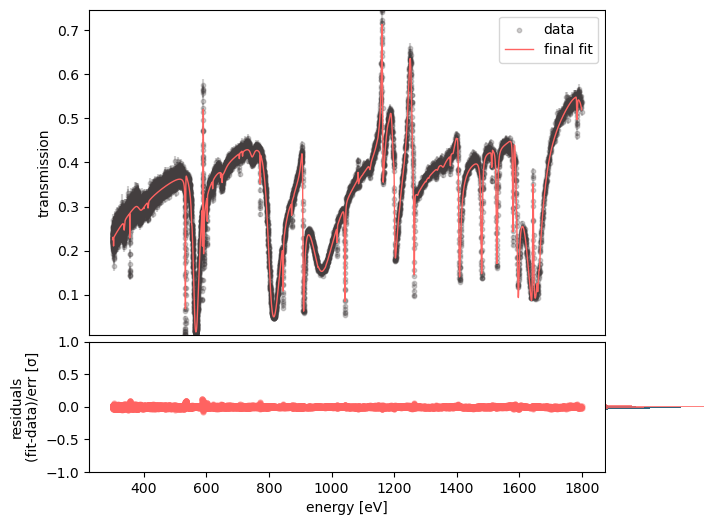

In [12]:
# Plot the transmission data loaded from the LST file
results_manager.plot_transmission(show_diff=True)